In [143]:
import mpl_scatter_density

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics

[Import google sheet as pandas dataframe](https://medium.com/@vince.shields913/reading-google-sheets-into-a-pandas-dataframe-with-gspread-and-oauth2-375b932be7bf)

In [39]:
import gspread
from oauth2client.service_account import ServiceAccountCredentials
import pandas as pd

scope = ['https://spreadsheets.google.com/feeds',
         'https://www.googleapis.com/auth/drive']

credentials = ServiceAccountCredentials.from_json_keyfile_name(
         '/home/olga/.google/gspread for pandas-d5ffe846d87f.json', scope) 
gc = gspread.authorize(credentials)

sheets = gc.open("Number of k-mers in noncoding vs coding RNA seqs")
sheet2 = sheets.get_worksheet(1)

data = sheet2.get_all_values()
headers = data.pop(0)

df = pd.DataFrame(data, columns=headers)
df['jaccard'] = df['jaccard'].astype(float)
df['ksize'] = df['ksize'].astype(int)
print(df.shape)
df.head()

(2000, 9)


,sequence_id,sequence,compared_to,jaccard,ksize,is_coding,Notes,Top BLAT hit (hg38),Alternative BLAT hit (hg38)
0,SRR306838.10559374 Ibis_Run100924_C3PO:6:51:17...,CGCTTGCTTAATACTGACATCAATAATATTAGGAAAATCGCAATAT...,coding,0.037736,15,TRUE,,,
1,SRR306838.10559374 Ibis_Run100924_C3PO:6:51:17...,CGCTTGCTTAATACTGACATCAATAATATTAGGAAAATCGCAATAT...,non_coding,0.000000,15,TRUE,,,
2,SRR306838.6196593 Ibis_Run100924_C3PO:6:29:167...,TCTAGAATGTGAAATAACGTACTTCATGTGTCTTCTTACCAAAAAT...,coding,0.035088,15,FALSE,,,
3,SRR306838.6196593 Ibis_Run100924_C3PO:6:29:167...,TCTAGAATGTGAAATAACGTACTTCATGTGTCTTCTTACCAAAAAT...,non_coding,0.017544,15,FALSE,,,
4,SRR306838.20767303 Ibis_Run100924_C3PO:6:104:6...,CAATCATCATCACTTTCTAATTCCAGAATATTTTCATCACCCCAAA...,coding,0.092593,15,FALSE,,,


In [40]:
df.dtypes

sequence_id                     object
sequence                        object
compared_to                     object
jaccard                        float64
ksize                            int64
is_coding                       object
Notes                           object
Top BLAT hit (hg38)             object
Alternative BLAT hit (hg38)     object
dtype: object

In [22]:
df['is_coding'] = df.is_coding.astype(bool)
df.head()

,sequence_id,sequence,compared_to,jaccard,ksize,is_coding,Notes,Top BLAT hit (hg38),Alternative BLAT hit (hg38)
0,SRR306838.10559374 Ibis_Run100924_C3PO:6:51:17...,CGCTTGCTTAATACTGACATCAATAATATTAGGAAAATCGCAATAT...,coding,0.03773584906,15,True,,,
1,SRR306838.10559374 Ibis_Run100924_C3PO:6:51:17...,CGCTTGCTTAATACTGACATCAATAATATTAGGAAAATCGCAATAT...,non_coding,0,15,True,,,
2,SRR306838.6196593 Ibis_Run100924_C3PO:6:29:167...,TCTAGAATGTGAAATAACGTACTTCATGTGTCTTCTTACCAAAAAT...,coding,0.0350877193,15,True,,,
3,SRR306838.6196593 Ibis_Run100924_C3PO:6:29:167...,TCTAGAATGTGAAATAACGTACTTCATGTGTCTTCTTACCAAAAAT...,non_coding,0.01754385965,15,True,,,
4,SRR306838.20767303 Ibis_Run100924_C3PO:6:104:6...,CAATCATCATCACTTTCTAATTCCAGAATATTTTCATCACCCCAAA...,coding,0.09259259259,15,True,,,


In [29]:
data2d = df.pivot(index='sequence_id', columns='compared_to', values='jaccard')
data2d = data2d.astype(float)
print(data2d.shape)
data2d.head()

(1000, 2)


compared_to,coding,non_coding
sequence_id,,
SRR306838.10056927 Ibis_Run100924_C3PO:6:49:3497:3522/1,0.018519,0.074074
SRR306838.10058398 Ibis_Run100924_C3PO:6:49:12427:3678/1,0.018182,0.054545
SRR306838.10074828 Ibis_Run100924_C3PO:6:49:3892:5474/1,0.000000,0.527273
SRR306838.10153772 Ibis_Run100924_C3PO:6:49:18145:14035/1,0.035714,0.125000
SRR306838.10237764 Ibis_Run100924_C3PO:6:50:6024:2605/1,0.046512,0.023256


In [30]:
data2d.dtypes

compared_to
coding        float64
non_coding    float64
dtype: object

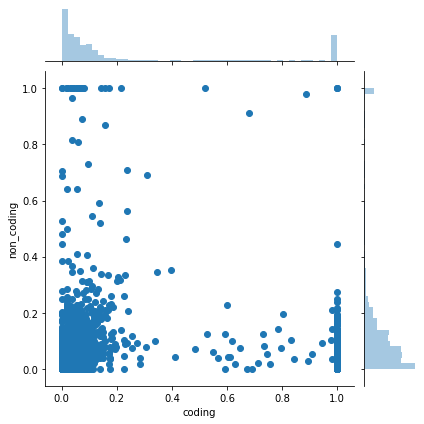

In [31]:
sns.jointplot(x='coding', y='non_coding', data=data2d)

In [42]:
df.groupby('compared_to').apply(lambda x: (x['jaccard'] > 0.5).sum())

compared_to
coding        164
non_coding     49
dtype: int64

In [43]:
data2d.query("coding > 0.8 & non_coding > 0.8")

compared_to,coding,non_coding
sequence_id,,
SRR306838.10763076 Ibis_Run100924_C3PO:6:52:5707:18906/1,1.000000,1.000000
SRR306838.12400067 Ibis_Run100924_C3PO:6:61:13790:17730/1,1.000000,1.000000
SRR306838.12837708 Ibis_Run100924_C3PO:6:64:16193:5865/1,0.888889,0.981481
SRR306838.8932718 Ibis_Run100924_C3PO:6:43:3539:6481/1,1.000000,1.000000


In [44]:
data2d.query("coding > 0.8 & non_coding > 0.4")

compared_to,coding,non_coding
sequence_id,,
SRR306838.10286133 Ibis_Run100924_C3PO:6:50:4821:7893/1,1.000000,0.444444
SRR306838.10763076 Ibis_Run100924_C3PO:6:52:5707:18906/1,1.000000,1.000000
SRR306838.12400067 Ibis_Run100924_C3PO:6:61:13790:17730/1,1.000000,1.000000
SRR306838.12837708 Ibis_Run100924_C3PO:6:64:16193:5865/1,0.888889,0.981481
SRR306838.8932718 Ibis_Run100924_C3PO:6:43:3539:6481/1,1.000000,1.000000


In [45]:
data2d.query("coding > 0.8 & non_coding < 0.4")

compared_to,coding,non_coding
sequence_id,,
SRR306838.10298381 Ibis_Run100924_C3PO:6:50:5488:9212/1,1.000000,0.041667
SRR306838.10426410 Ibis_Run100924_C3PO:6:51:5434:2604/1,1.000000,0.000000
SRR306838.10441250 Ibis_Run100924_C3PO:6:51:6227:4241/1,1.000000,0.035714
SRR306838.10450914 Ibis_Run100924_C3PO:6:51:16655:5293/1,1.000000,0.190476
SRR306838.10453896 Ibis_Run100924_C3PO:6:51:10441:5624/1,1.000000,0.120000
SRR306838.10479778 Ibis_Run100924_C3PO:6:51:5858:8459/1,1.000000,0.019608
SRR306838.10575967 Ibis_Run100924_C3PO:6:51:8808:18946/1,0.982456,0.210526
SRR306838.10686081 Ibis_Run100924_C3PO:6:52:5500:10522/1,1.000000,0.000000
SRR306838.10762491 Ibis_Run100924_C3PO:6:52:17489:18838/1,1.000000,0.173077


In [62]:
! cp ../data/SRR306838_GSM752691_hsa_br_F_1_trimmed_k15.tsv /home/olga/data_sm/kmer-hashing/brawand2011/human/

## Read bam file filtered for just coding sequences to get the sequence ids

In [64]:
folder = '/home/olga/data_sm/kmer-hashing/brawand2011/human/'
! ls -lha $folder

coding_read_ids = pd.read_csv(f"{folder}/SRR306838_GSM752691_hsa_br_F_1Aligned.sortedByCoord.out.bam.unspliced.out_CDS_without_stop_codon_or_utr.read_ids.txt", 
                                   header=None, squeeze=True)
print(coding_read_ids.shape)
coding_read_ids.head()

true_coding_read_ids = set(coding_read_ids.values)
len(true_coding_read_ids)

unspliced_read_ids_series = pd.read_csv(f"{folder}/SRR306838_GSM752691_hsa_br_F_1Aligned.sortedByCoord.out.bam.unspliced.read_ids.txt", 
                                   header=None, squeeze=True)
print(unspliced_read_ids_series.shape)
unspliced_read_ids_series.head()

unspliced_reads = set(unspliced_read_ids_series.values)

In [190]:
full_classification = pd.read_csv("/home/olga/data_sm/kmer-hashing/brawand2011/human/SRR306838_GSM752691_hsa_br_F_1_trimmed_k15.tsv", sep='\t', skiprows=2)
print(full_classification.shape)
full_classification.head()

(1591034, 5)


,sequence_id,sequence,compared_to,jaccard,ksize
0,SRR306838.1531 Ibis_Run100924_C3PO:6:1:15718:1062/1,ACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC,coding,0.500000,15
1,SRR306838.1531 Ibis_Run100924_C3PO:6:1:15718:1062/1,ACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC,non_coding,1.000000,15
2,SRR306838.1617 Ibis_Run100924_C3PO:6:1:9036:1074/1,CGTTGGTCAAGTTATTGGATCAATTGAGTATAGTAGTTCGCTTTGACTGGTGAAGTCTTAGCATG,coding,0.019608,15
3,SRR306838.1617 Ibis_Run100924_C3PO:6:1:9036:1074/1,CGTTGGTCAAGTTATTGGATCAATTGAGTATAGTAGTTCGCTTTGACTGGTGAAGTCTTAGCATG,non_coding,0.019608,15
4,SRR306838.1672 Ibis_Run100924_C3PO:6:1:15751:1077/1,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC,coding,1.000000,15


In [191]:
full_classification['short_sequence_id'] = full_classification.sequence_id.str.split().str[0]
print(full_classification.shape)
full_classification.head()

full_classification_unspliced = full_classification.query("short_sequence_id in @unspliced_reads")
print(full_classification_unspliced.shape)
full_classification_unspliced.head()

full_classification_unspliced['is_coding'] = full_classification_unspliced.short_sequence_id.isin(true_coding_read_ids)
print(full_classification_unspliced['is_coding'].sum())
full_classification_unspliced.head()

In [194]:
full_classification_unspliced.sample(10)

,sequence_id,sequence,compared_to,jaccard,ksize,short_sequence_id,is_coding
1495715,SRR306838.22728373 Ibis_Run100924_C3PO:6:113:14370:3716/1,GAAGAACATCAAGTTTAAAAGCCAGTTATGAAGCATTTAAGAATAATGACTTTCAGTTGGGAAAAGAATT,non_coding,0.107143,15,SRR306838.22728373,False
881700,SRR306838.14173220 Ibis_Run100924_C3PO:6:71:6256:10346/1,AAGATGTTGGTCATCTGGTGGTCTTATTGTGATTGAGGGCATAGGCTGGAATCCTTCTTCACTGGCTGG,coding,0.054545,15,SRR306838.14173220,True
334862,SRR306838.8246852 Ibis_Run100924_C3PO:6:39:4892:16563/1,CTCTACTCAATGCATTAGCACATATACCAAATTATACTATCTGCATGACAGTCTCTAG,coding,0.045455,15,SRR306838.8246852,False
1220093,SRR306838.18866843 Ibis_Run100924_C3PO:6:95:12459:5820/1,GGGTAGCAAAAGCCAAAAGCCCAGAAAGTATTCTGCTTCCTTTGTCCTCTTCCATTTTAGCCAGGCA,non_coding,0.075472,15,SRR306838.18866843,False
459771,SRR306838.10635343 Ibis_Run100924_C3PO:6:52:14895:4971/1,GGGTGGCTTATTTATGATTGCTCAGTTCACTATAAGCTCAAATACTGAACATCACAATGTGGACAAGACAA,non_coding,0.087719,15,SRR306838.10635343,False
1322595,SRR306838.20764393 Ibis_Run100924_C3PO:6:104:18112:4783/1,AACTTGATGTTCCACCTGCCACAAACCACCAGGACTGAAAGAAGAAAACAGTACAGAAGGCAA,non_coding,0.102041,15,SRR306838.20764393,False
398771,SRR306838.9605183 Ibis_Run100924_C3PO:6:46:6155:16407/1,CTCCAGTGTGCATCCTCTTATGTCTAGTTAGTGTTGAGGACCATATAAATGCTTTGCCACATTCTTCACAC,non_coding,0.175439,15,SRR306838.9605183,False
1026838,SRR306838.15593402 Ibis_Run100924_C3PO:6:78:4099:19357/1,ATCCAACTCAAAGACCTCTGTGTCGACTGTTCACTTTGTGGATCATCTCTGGCTCATTTAAAACATCCTGC,coding,0.035088,15,SRR306838.15593402,False
301093,SRR306838.7632383 Ibis_Run100924_C3PO:6:36:6012:14512/1,CAGGGATTCAATGGGAAATGAGGAAACCTGGGAATGACAGATTCTAAGGGTTGTGGTGATGGTTTCA,non_coding,0.094340,15,SRR306838.7632383,False
1029068,SRR306838.15650401 Ibis_Run100924_C3PO:6:79:5772:4882/1,TTTTTCGCGGAGGTATTTTTCTCTACAGCGATCACATACCAGATACCAAGTGCTTCCTCCTATGCCACC,coding,0.036364,15,SRR306838.15650401,True


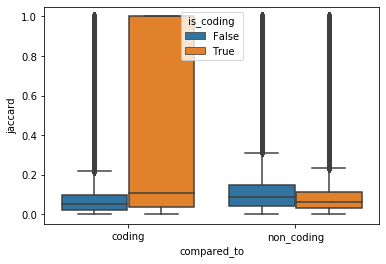

In [195]:
sns.boxplot(x='compared_to', y='jaccard', data=full_classification_unspliced, hue='is_coding')

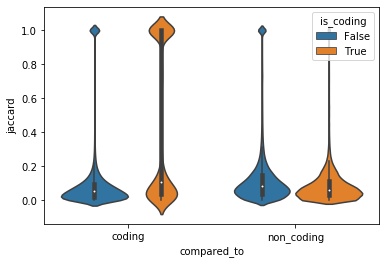

In [196]:
sns.violinplot(x='compared_to', y='jaccard', data=full_classification_unspliced, hue='is_coding')

In [199]:
full_classification_unspliced['jaccard_above_0.5'] = full_classification_unspliced['jaccard'] > 0.5
full_classification_unspliced.head()

/home/olga/miniconda3/envs/sourmash-sbt2knn/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,sequence_id,sequence,compared_to,jaccard,ksize,short_sequence_id,is_coding,jaccard_above_0.5
2,SRR306838.1617 Ibis_Run100924_C3PO:6:1:9036:1074/1,CGTTGGTCAAGTTATTGGATCAATTGAGTATAGTAGTTCGCTTTGACTGGTGAAGTCTTAGCATG,coding,0.019608,15,SRR306838.1617,False,False
3,SRR306838.1617 Ibis_Run100924_C3PO:6:1:9036:1074/1,CGTTGGTCAAGTTATTGGATCAATTGAGTATAGTAGTTCGCTTTGACTGGTGAAGTCTTAGCATG,non_coding,0.019608,15,SRR306838.1617,False,False
4,SRR306838.1672 Ibis_Run100924_C3PO:6:1:15751:1077/1,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC,coding,1.000000,15,SRR306838.1672,False,True
5,SRR306838.1672 Ibis_Run100924_C3PO:6:1:15751:1077/1,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC,non_coding,1.000000,15,SRR306838.1672,False,True
6,SRR306838.1938 Ibis_Run100924_C3PO:6:1:15775:1103/1,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC,coding,1.000000,15,SRR306838.1938,False,True


In [200]:
full_classification_unspliced.groupby(['is_coding', 'compared_to']).apply(lambda x: 100*x['jaccard_above_0.5'].sum()/len(x))

is_coding  compared_to
False      coding          5.875553
           non_coding      5.169772
True       coding         37.372662
           non_coding      1.303489
dtype: float64

In [201]:
full_classification_unspliced.head()

,sequence_id,sequence,compared_to,jaccard,ksize,short_sequence_id,is_coding,jaccard_above_0.5
2,SRR306838.1617 Ibis_Run100924_C3PO:6:1:9036:1074/1,CGTTGGTCAAGTTATTGGATCAATTGAGTATAGTAGTTCGCTTTGACTGGTGAAGTCTTAGCATG,coding,0.019608,15,SRR306838.1617,False,False
3,SRR306838.1617 Ibis_Run100924_C3PO:6:1:9036:1074/1,CGTTGGTCAAGTTATTGGATCAATTGAGTATAGTAGTTCGCTTTGACTGGTGAAGTCTTAGCATG,non_coding,0.019608,15,SRR306838.1617,False,False
4,SRR306838.1672 Ibis_Run100924_C3PO:6:1:15751:1077/1,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC,coding,1.000000,15,SRR306838.1672,False,True
5,SRR306838.1672 Ibis_Run100924_C3PO:6:1:15751:1077/1,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC,non_coding,1.000000,15,SRR306838.1672,False,True
6,SRR306838.1938 Ibis_Run100924_C3PO:6:1:15775:1103/1,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC,coding,1.000000,15,SRR306838.1938,False,True


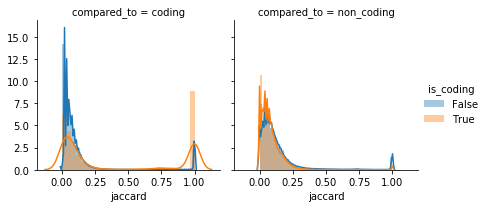

In [202]:
g = sns.FacetGrid(data=full_classification_unspliced, hue='is_coding', col='compared_to')
g.map(sns.distplot, 'jaccard')
g.add_legend()

#### Make true prediction classes

In [203]:
full_classification_unspliced['y_true'] = full_classification_unspliced.apply(
    lambda x: x['is_coding'] if x['compared_to'] == 'coding' else not x['is_coding'], axis=1)


/home/olga/miniconda3/envs/sourmash-sbt2knn/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [204]:
full_classification_unspliced.groupby(['compared_to', 'is_coding', 'y_true']).size()

compared_to  is_coding  y_true
coding       False      False     531184
             True       True      150289
non_coding   False      True      531184
             True       False     150289
dtype: int64

In [205]:
full_classification_unspliced['y_true'].tail()

1591027     True
1591028    False
1591029     True
1591030    False
1591031     True
Name: y_true, dtype: bool

In [206]:
full_classification_unspliced.sample(10)

,sequence_id,sequence,compared_to,jaccard,ksize,short_sequence_id,is_coding,jaccard_above_0.5,y_true
398287,SRR306838.9585730 Ibis_Run100924_C3PO:6:46:8001:14308/1,TCAGGTTCTTCTGAGTGGTGTTTTTGAAAAAAATATGTAAAATAAAAATAGAAACATTCTTTGTCAAATACT,non_coding,0.344828,15,SRR306838.9585730,False,False,True
125308,SRR306838.3379635 Ibis_Run100924_C3PO:6:16:6155:4074/1,GTCAGTGTCAGGATCCAAGCCTTCAGGGCAGGG,coding,0.052632,15,SRR306838.3379635,True,False,True
1231310,SRR306838.19067935 Ibis_Run100924_C3PO:6:96:18225:5122/1,GCAAAAGCTCACTCATGTTCTTATTGCAGCAATTATTGGAGCTGTACAGATTGCCATCATAGTAGCAATTG,coding,1.000000,15,SRR306838.19067935,True,True,True
1559470,SRR306838.23644097 Ibis_Run100924_C3PO:6:117:18331:5230/1,ATTTTATATTCACTTCCACACCTTTTTATGCTTTCTTACTAAAGCGATGATTTAGTTTCTACACAGTTTCGTC,coding,0.000000,15,SRR306838.23644097,False,False,False
404558,SRR306838.9699528 Ibis_Run100924_C3PO:6:47:12444:6062/1,GGTGGTAGTTTGTGTTTAATGTTTTTAGTTGGGTGATGAGGAATAGTGTAAGGAGTATGGGGG,coding,0.081633,15,SRR306838.9699528,True,False,True
396975,SRR306838.9548999 Ibis_Run100924_C3PO:6:46:5360:10368/1,TACTAATAAAATGCAAGTTCTCTATTCATAAGTGGATTTAGTGAACCAAGCCTTTCTCATTTGCAGG,non_coding,0.132075,15,SRR306838.9548999,True,False,False
300079,SRR306838.7599534 Ibis_Run100924_C3PO:6:36:4870:11160/1,GGAAACTATCATTAGGGAGGGTTTAGTTGGTTGCTGTTTGGACTGGG,non_coding,0.000000,15,SRR306838.7599534,False,False,True
1269479,SRR306838.19813273 Ibis_Run100924_C3PO:6:99:12869:16271/1,TTGAAGAAGCACATTATTAAATACTCTTGTAATATCAATCTGCACATAGTTTTCTATTGACTGGAGTACG,non_coding,0.035714,15,SRR306838.19813273,True,False,False
359741,SRR306838.8730256 Ibis_Run100924_C3PO:6:42:4638:5634/1,TGAAGCTTTCAGTTTCAAATCAAACCTTGAAAGACATAGGATAATTCATACTGGAGAGAAACTTTACA,non_coding,0.148148,15,SRR306838.8730256,True,False,False
853951,SRR306838.13830501 Ibis_Run100924_C3PO:6:69:12818:13817/1,TGACAGTGAGCTGGAACTGCAGGAACTTGGAGATGCTGTCATAGACATTTCGTCCCCACATCACTGCCTTC,non_coding,0.105263,15,SRR306838.13830501,True,False,False


In [207]:
fpr, tpr, thresholds = metrics.roc_curve(full_classification_unspliced['y_true'], full_classification_unspliced['jaccard'])

fig, ax = plt.subplots()
lw = 2
ax.plot(fpr, tpr, lw=2, color='darkorange')
ax.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

### Compute true positive/false positive rates for different classes

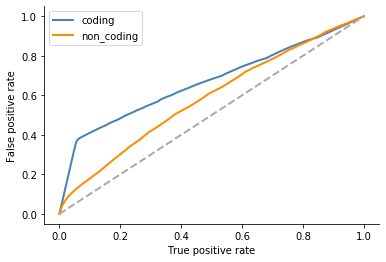

In [208]:
fig, ax = plt.subplots()

colors = ['steelblue', 'darkorange']

for color, (group, df) in zip(colors, full_classification_unspliced.groupby(['compared_to'])):
    fpr, tpr, thresholds = metrics.roc_curve(df['y_true'], df['jaccard'])
    lw = 2
    ax.plot(fpr, tpr, lw=2, color=color, label=group)
ax.plot([0, 1], [0, 1], color='darkgrey', lw=lw, linestyle='--')
ax.legend()
ax.set(xlabel='True positive rate', ylabel='False positive rate')
sns.despine()

In [210]:
data2d_full = full_classification_unspliced.pivot(index='sequence_id', columns='compared_to', values='jaccard')
print(data2d_full.shape)
data2d_full.head()

(681473, 2)


compared_to,coding,non_coding
sequence_id,,
SRR306838.10000016 Ibis_Run100924_C3PO:6:48:8374:17832/1,0.019231,0.115385
SRR306838.10000068 Ibis_Run100924_C3PO:6:48:16607:17829/1,0.000000,0.109091
SRR306838.10000111 Ibis_Run100924_C3PO:6:48:5238:17844/1,0.057692,0.365385
SRR306838.10000150 Ibis_Run100924_C3PO:6:48:12289:17841/1,0.020408,0.081633
SRR306838.1000019 Ibis_Run100924_C3PO:6:5:14843:8533/1,0.109091,0.072727


## What is going on with the ones that are truly coding but aren't k-mer mapping to coding sequences?

In [211]:
pd.options.display.max_colwidth = 100

In [212]:
full_classification_unspliced.query('is_coding == True & compared_to == "coding" & jaccard < 0.5').head()

,sequence_id,sequence,compared_to,jaccard,ksize,short_sequence_id,is_coding,jaccard_above_0.5,y_true
24,SRR306838.5359 Ibis_Run100924_C3PO:6:1:8766:1402/1,CGGGGGTCTAGTTCTGCATCTGCTC,coding,0.000000,15,SRR306838.5359,True,False,True
68,SRR306838.15166 Ibis_Run100924_C3PO:6:1:6016:2274/1,CTTTGGTGAGGGAGGTAGGTGGTAGTTTGTGTTTAATGTTTTTAGTTGGGTGATGAGGAATAGTG,coding,0.078431,15,SRR306838.15166,True,False,True
106,SRR306838.18642 Ibis_Run100924_C3PO:6:1:17012:2577/1,CTTCCTCATCTCCTCAAAATCTTTCATGACATCATAGTTTCTGTAGAAATCTGCGTATGCCTTCT,coding,0.058824,15,SRR306838.18642,True,False,True
128,SRR306838.20315 Ibis_Run100924_C3PO:6:1:19107:2727/1,TCCACATCTGCTTTTGTTATTTCTTGGTCTTCAATTTCAATTTCTAAGGATTCCTCAATTGGA,coding,0.020408,15,SRR306838.20315,True,False,True
138,SRR306838.21779 Ibis_Run100924_C3PO:6:1:5918:2864/1,CGAGTTTTTACTAGATTGCTGCAAATTTCATGGAATCTTTGCTGTTGTTC,coding,0.027778,15,SRR306838.21779,True,False,True


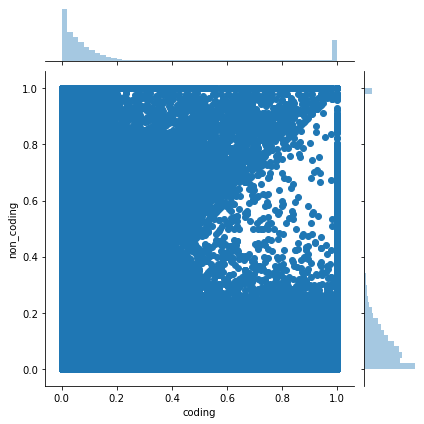

In [213]:
sns.jointplot(x='coding', y='non_coding', data=data2d_full)

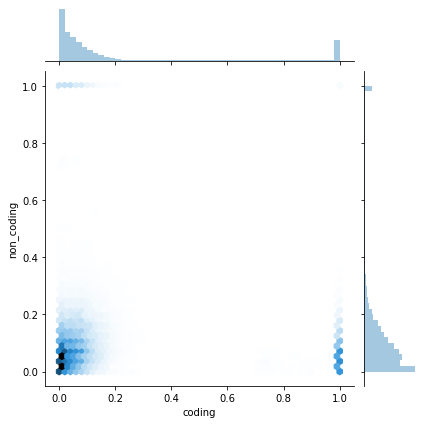

In [214]:
sns.jointplot(x='coding', y='non_coding', data=data2d_full, kind='hex')

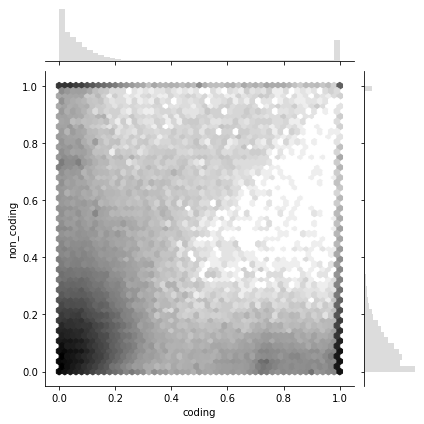

In [215]:
sns.jointplot(x='coding', y='non_coding', data=data2d_full, kind='hex', bins='log', color='darkgrey')

## Subset to truly coding data

(150289, 2)


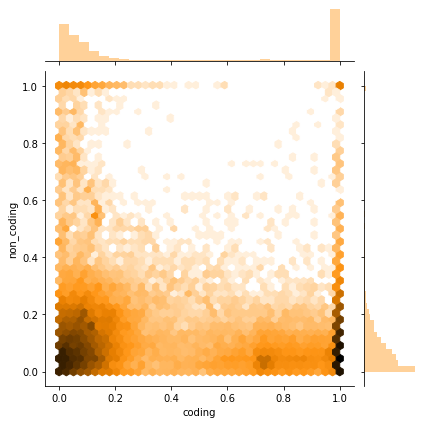

In [217]:
data2d_is_coding = full_classification_unspliced.query('is_coding == True').pivot(index='sequence_id', columns='compared_to', values='jaccard')
print(data2d_is_coding.shape)
data2d_is_coding.head()

sns.jointplot(x='coding', y='non_coding', data=data2d_is_coding, kind='hex', bins='log', color='DarkOrange')

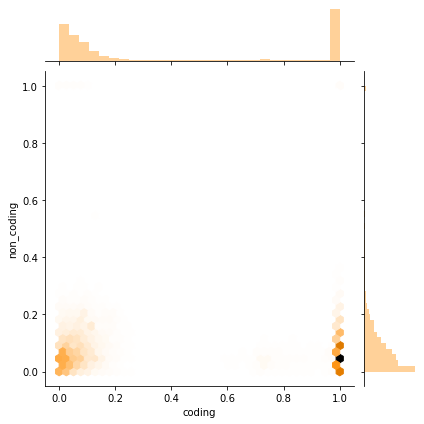

In [222]:
sns.jointplot(x='coding', y='non_coding', data=data2d_is_coding, kind='hex', color='DarkOrange')

### Subset to noncoding data

(531184, 2)


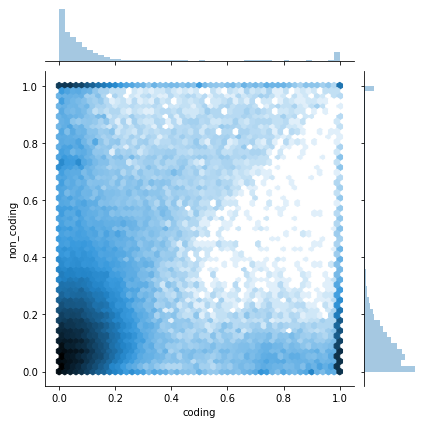

In [218]:
data2d_non_coding = full_classification_unspliced.query('is_coding == False').pivot(index='sequence_id', columns='compared_to', values='jaccard')
print(data2d_non_coding.shape)
data2d_non_coding.head()

sns.jointplot(x='coding', y='non_coding', data=data2d_non_coding, kind='hex', bins='log')

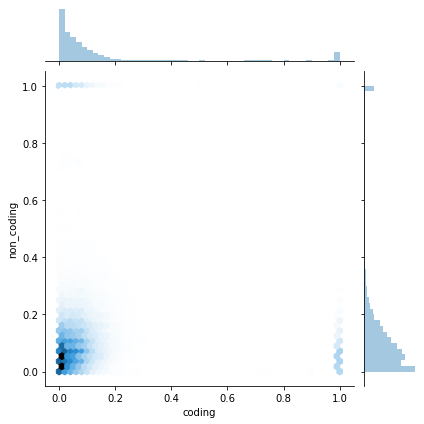

In [223]:
sns.jointplot(x='coding', y='non_coding', data=data2d_non_coding, kind='hex')

/home/olga/miniconda3/envs/sourmash-sbt2knn/lib/python3.7/site-packages/mpl_scatter_density/generic_density_artist.py:74: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/home/olga/miniconda3/envs/sourmash-sbt2knn/lib/python3.7/site-packages/mpl_scatter_density/generic_density_artist.py:79: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)


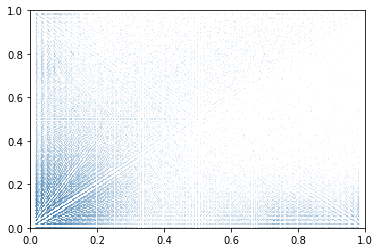

In [219]:
x = data2d_full['coding']
y = data2d_full['non_coding']

# Make the norm object to define the image stretch
from astropy.visualization import LogStretch
from astropy.visualization.mpl_normalize import ImageNormalize
norm = ImageNormalize(vmin=0., vmax=1000, stretch=LogStretch())

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='scatter_density')
ax.scatter_density(x, y, color='steelblue', norm=norm)
# ax.set_xlim(-5, 10)
# ax.set_ylim(-5, 10)
# fig.savefig('gaussian.png')

In [221]:
# sns.jointplot(x='coding', y='non_coding', data=data2d_full, joint_kws=dict(projection='scatter_density'))